# Ejercicio 1 - guía 3

Consideremos la función 𝑓 : R → R dada por 𝑓 (𝑥) = 2𝑥 − 1.

## a)
Sean 𝑋 ∼ U (0, 1) y 𝑌 := 𝑓 (𝑋). Fijemos 𝑛 = 100. Tomar muestras 𝑥1, . . . , 𝑥𝑛 de 𝑋 y aplicar la
función 𝑓 a cada muestra para calcular 𝑦𝑖 = 𝑓 (𝑥𝑖), con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de
la forma 𝑌 = 𝑋 𝛽1 + 𝛽0 + 𝜖 a partir de los samples (𝑥1, 𝑦1), . . . , (𝑥𝑛, 𝑦𝑛) generados y calcular,
para cada 𝑖 ∈ {1, . . . , 𝑛},

* 𝜀𝑖 = 𝑦𝑖 − (𝑥𝑖𝛽1 + 𝛽0).

Describir la distribución empírica dada por {𝜀1, . . . , 𝜀𝑛}.

### Desarrollo

Primero defino a la f(x):

In [1]:
def f(x:float) -> float: return 2*x -1

Ahora genero las 100 muestras requeridas, las evaluo en f(x) y las voy guardando en un dataframe:

In [4]:
import pandas as pd
from scipy.stats import uniform

X = uniform.rvs(size=100)

df_experimento = pd.DataFrame(
    {'X': X,
     'Y': [f(x) for x in X]
     }
    )

Ahora realizo el ajuste lineal:

In [13]:
import numpy as np

def generar_regresion_lineal_simple(X:pd.Series, Y:pd.Series) -> tuple[float, float, list[float]]:
    '''
    Estima los coeficientes de una regresión lineal simple, B1 y B0, 
    junto a los errores de estimación a partir de dos series de datos X e Y.
    '''
    
    # Calculo las medias de X e Y
    X_promedio = X.mean()
    Y_promedio = Y.mean()
    
    # Calculo el numerador y el denominador de la fórmula de B1
    numerador = sum((X - X_promedio)*(Y - Y_promedio))
    denominador = sum((X - X_promedio)**2)
    
    # Calculo B1
    B1 = numerador / denominador
    
    # Calculo B0
    B0 = Y_promedio - B1*X_promedio
    
    # Calculo el error de estimación
    errores = Y - (B0 + B1 * X)
    
    return B1, B0, errores.tolist() 

# Hago una estimación de los coeficientes
B1, B0, e = generar_regresion_lineal_simple(df_experimento['X'], df_experimento['Y'])

print(f'Coeficientes del ajuste lineal de la función f(x) = 2x - 1: B1 = {B1}, B0 = {B0}, error medio = {np.mean(e)}')

Coeficientes del ajuste lineal de la función f(x) = 2x - 1: B1 = 2.0, B0 = -1.0, error medio = 0.0


En este caso al ser X e Y linealmente dependientes el ajuste del modelo es perfecto, lo que causa que los errores sean todos 0 para cada Xi individual. Por lo tanto la distribución
empírica de los errores de estimación es constante y siempre 0.

## b)
Sean𝑋 ∼ U (0, 1), 𝑍 ∼ N (0, .25) y 𝑌 := 𝑓 (𝑋)+𝑍. Fijemos 𝑛 = 100. Tomar muestras 𝑥1, . . . , 𝑥𝑛
de 𝑋 y 𝑧1, . . . , 𝑧𝑛 de 𝑍 y calcular 𝑦𝑖 = 𝑓 (𝑥𝑖) + 𝑧𝑖
, con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de
la forma 𝑌 = 𝑋 𝛽1 + 𝛽0 + 𝜖 a partir de los samples (𝑥1, 𝑦1), . . . , (𝑥𝑛, 𝑦𝑛) generados y calcular,
para cada 𝑖 ∈ {1, . . . , 𝑛},

* 𝜀𝑖 = 𝑦𝑖 − (𝑥𝑖𝛽1 + 𝛽0).

Describir la distribución empírica dada por {𝜀1, . . . , 𝜀𝑛} haciendo un histograma.

### Desarrollo

Sigo un procedimiento similar al inciso **a)**, pero ahora agregando al ruido Z:

In [14]:
from scipy.stats import norm

# Función real
def f(x:float, z:float) -> float: return 2*x -1 + z

# Genero 100 muestras de X y Z
X = uniform.rvs(size=100)
Z = norm.rvs(loc=0, scale= 0.25,size=100)

df_experimento = pd.DataFrame(
    {'X': X,
     'Z': Z,
     'Y': [f(x, z) for x, z in zip(X, Z)]
     }
    )

Ahora realizo el ajuste lineal:

In [15]:
B1, B0, e = generar_regresion_lineal_simple(df_experimento['X'], df_experimento['Y'])

print(f'Coeficientes del ajuste lineal de la función f(x) = 2x - 1: B1 = {B1}, B0 = {B0}, error medio = {np.mean(e)}')

Coeficientes del ajuste lineal de la función f(x) = 2x - 1: B1 = 2.1330075755756757, B0 = -1.0756068911576395, error medio = -1.27675647831893e-17


Describo la distribución empírica de los errores de estimación usando un histograma:

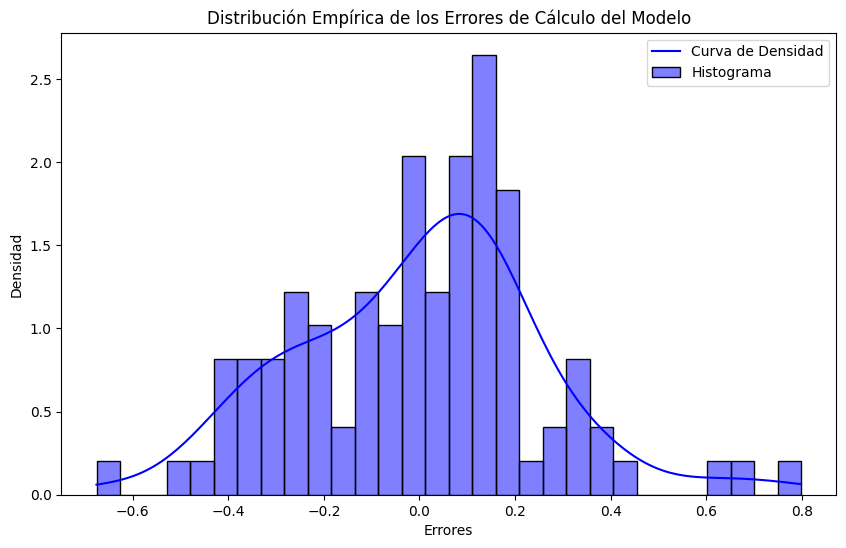

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Suponiendo que 'e' es la lista de errores
e = np.array(e)  # Convertir la lista de errores a un array de numpy

# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(e, bins=30, kde=True, color='blue', stat='density', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Distribución Empírica de los Errores de Cálculo del Modelo')
plt.xlabel('Errores')
plt.ylabel('Densidad')

# Añadir una leyenda
plt.legend(['Curva de Densidad', 'Histograma'])

# Mostrar el gráfico
plt.show()

## c)
Repetir el paso anterior desde 𝑛 = 10 hasta 𝑛 = 1000. Graficar y estimar la media y la varianza
de 𝜀 en función de 𝑛.

### Desarrollo

Ahora encapsulo todo el flujo anterior en un solo recuadro para llevar a cabo el experimento: 

In [34]:
'''
    Genero dos dataframes vacios, uno con n y la media de los errores de estimación
    y otro con n y la desviación estándar de los errores de estimación.
'''

df_varianza_e = pd.DataFrame(columns=['n', 'varianza_e'])
df_media_e = pd.DataFrame(columns=['n', 'media_e'])

for n in range(10, 101):
    X = uniform.rvs(size=n)
    Z = norm.rvs(loc=0, scale= 0.25,size=n)

    df_experimento = pd.DataFrame(
        {'X': X,
         'Z': Z,
         'Y': [f(x, z) for x, z in zip(X, Z)]
         }
        )

    B1, B0, e = generar_regresion_lineal_simple(df_experimento['X'], df_experimento['Y'])
    
    df_varianza_e = pd.concat([df_varianza_e, pd.DataFrame({'n': [n], 'varianza_e': [np.var(e)]})], ignore_index=True)
    df_media_e = pd.concat([df_media_e, pd.DataFrame({'n': [n], 'media_e': [np.mean(e)]})], ignore_index=True)

C:\Users\gerar\AppData\Local\Temp\ipykernel_19760\2204771797.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_varianza_e = pd.concat([df_varianza_e, pd.DataFrame({'n': [n], 'varianza_e': [np.var(e)]})], ignore_index=True)
C:\Users\gerar\AppData\Local\Temp\ipykernel_19760\2204771797.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_media_e = pd.concat([df_media_e, pd.DataFrame({'n': [n], 'media_e': [np.mean(e)]})], ignore_index=True)


Ahora genero los gráficos de la media y varianza de los errores en función de n:

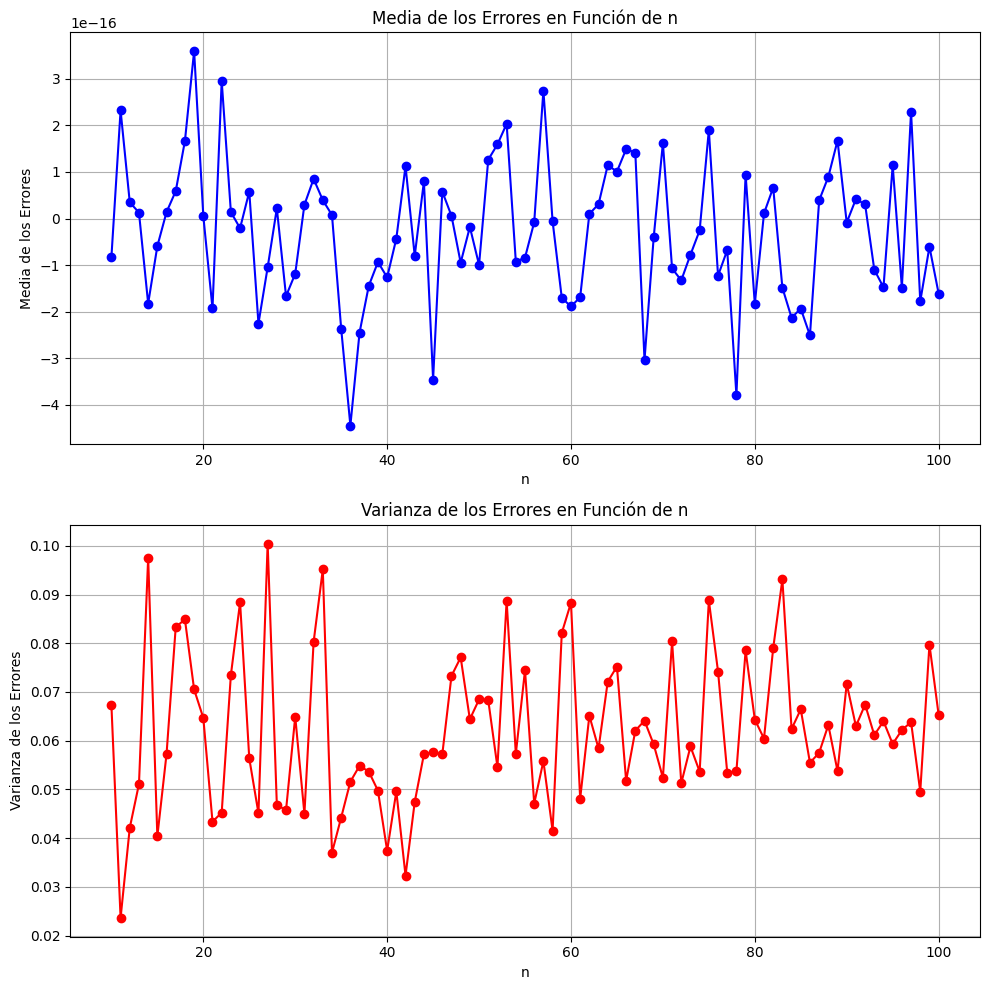

In [35]:
# Crear el gráfico
fig, ax1 = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico de la media de los errores
ax1[0].plot(df_media_e['n'], df_media_e['media_e'], marker='o', linestyle='-', color='b')
ax1[0].set_title('Media de los Errores en Función de n')
ax1[0].set_xlabel('n')
ax1[0].set_ylabel('Media de los Errores')
ax1[0].grid(True)

# Gráfico de la varianza de los errores
ax1[1].plot(df_varianza_e['n'], df_varianza_e['varianza_e'], marker='o', linestyle='-', color='r')
ax1[1].set_title('Varianza de los Errores en Función de n')
ax1[1].set_xlabel('n')
ax1[1].set_ylabel('Varianza de los Errores')
ax1[1].grid(True)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()